In [7]:
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister, execute, transpile, Aer, IBMQ # circuit creation and execution
from qiskit.providers.aer.noise import NoiseModel # simulate backends
from qiskit.visualization import plot_histogram # visualize results
from qiskit.quantum_info import Statevector, state_fidelity, hellinger_fidelity # statevector and metrics
from qiskit.providers.ibmq import least_busy # get least busy device
import qiskit.tools.jupyter # visualize backends
from qiskit.circuit.library.standard_gates.rx import RXGate
# from qiskit.ignis.mitigation.measurement import complete_meas_cal,CompleteMeasFitter # measurement error mitigation

import pandas as pd # handy tools for calculation
from numpy import pi

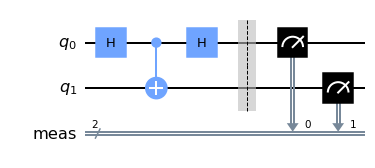

In [8]:


bomb_tester = QuantumCircuit(2)
bomb_tester.h(0)
bomb_tester.cx(0, 1)
bomb_tester.h(0)
bomb_tester.measure_all()
bomb_tester.draw(output='mpl')

In [9]:
print(bomb_tester.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg meas[2];
h q[0];
cx q[0],q[1];
h q[0];
barrier q[0],q[1];
measure q[0] -> meas[0];
measure q[1] -> meas[1];



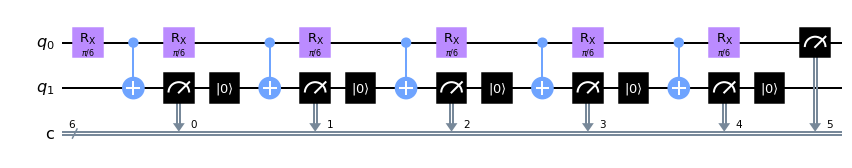

In [10]:
# Coding the Zeno bomb tester 

from qiskit.circuit import QuantumRegister, ClassicalRegister
import numpy as np
from qiskit.circuit.library import RXGate

cycles = 6 # Choose the number of times we want to pass our photon through the mystery box. The more, the better. 
theta = np.pi/cycles # The correct reflectivity of our beamsplitter is chosen for the quantum Zeno effect to work.

# Create our quantum circuit 
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(cycles, 'c')
zeno_tester = QuantumCircuit(qr, cr)

# Create a chain of our variable beamsplitters and C-NOT bombs 
for cycle in range(cycles-1):
    zeno_tester.append(RXGate(theta), [qr[0]])
    zeno_tester.cx(0, 1)
    zeno_tester.measure(qr[1],cr[cycle])
    zeno_tester.reset(qr[1])

# Add a final beamsplitter
zeno_tester.append(RXGate(theta), [qr[0]])

#Measure our photon to predict whether there is a bomb, and measure our bomb qubit to see if it exploded.    
zeno_tester.measure(qr[0],cr[cycles-1])
zeno_tester.draw(output='mpl')

In [11]:
print(zeno_tester.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[6];
rx(pi/6) q[0];
cx q[0],q[1];
measure q[1] -> c[0];
reset q[1];
rx(pi/6) q[0];
cx q[0],q[1];
measure q[1] -> c[1];
reset q[1];
rx(pi/6) q[0];
cx q[0],q[1];
measure q[1] -> c[2];
reset q[1];
rx(pi/6) q[0];
cx q[0],q[1];
measure q[1] -> c[3];
reset q[1];
rx(pi/6) q[0];
cx q[0],q[1];
measure q[1] -> c[4];
reset q[1];
rx(pi/6) q[0];
measure q[0] -> c[5];



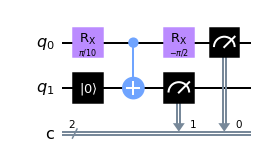

In [12]:
# basic circuit
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.rx(pi*1/10, qreg_q[0])
circuit.reset(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.rx(-pi/2, qreg_q[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw(output='mpl')

In [13]:
print(circuit.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
rx(pi/10) q[0];
reset q[1];
cx q[0],q[1];
rx(-pi/2) q[0];
measure q[1] -> c[1];
measure q[0] -> c[0];

